# Examples and use cases for the cluster_dag module

In [1]:
from clustercausal.clusterdag.ClusterDAG import ClusterDAG

In [2]:
# Define a cluster DAG
cluster_dict = {}
cluster_dict['clusters'] = {'C1':['X1','X2','X3'], 'C2': ['X4','X5'], 'C3':['X6','X7'], 'C4':['X8','X9']}
cluster_dict['cluster_edges'] = [('C1','C3'), ('C2','C3'), ('C3','C4'), ('C2','C4')] 
cdag = ClusterDAG(cluster_mapping=cluster_dict['clusters'], cluster_edges = cluster_dict['cluster_edges'])

In [3]:
print(cdag.get_cluster_topological_ordering())

['C1', 'C2', 'C3', 'C4']


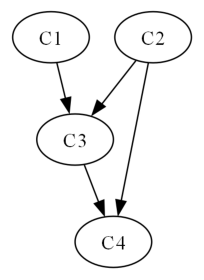

In [4]:
cdag.draw_cluster_graph()

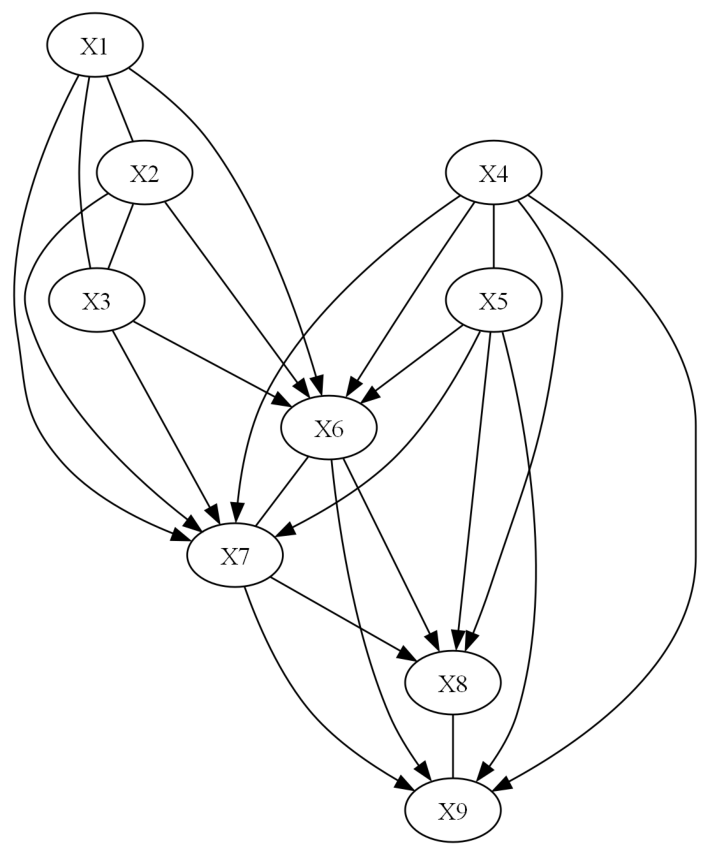

In [5]:
cdag.cdag_to_mpdag()
cdag.draw_mpdag()

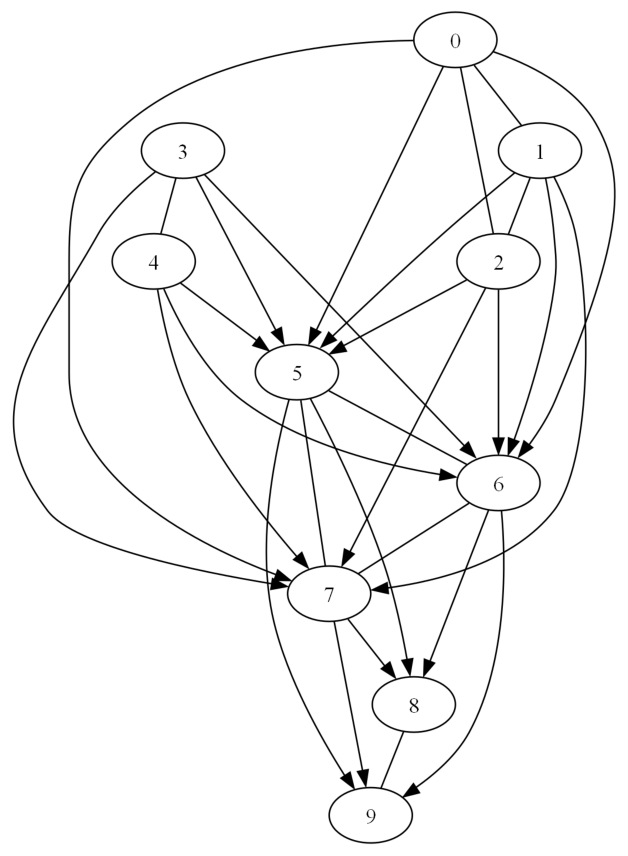

In [8]:
debug_nodes = ["0", "1", "2", "3", "4", "5", "6", "7"]
debug_edges = [
    ("0", "1"),
    ("2", "1"),
    ("2", "7"),
    ("1", "6"),
    ("0", "5"),
    ("3", "5"),
    ("4", "6"),
    ("3", "6"),
    ("5", "6"),
    ("6", "7"),
    ("7", "8"),
    ("8", "9"),
]
debug_cluster_mapping = {
    "X": ["0", "1", "2"],
    "Y": ["3", "4"],
    "Z": ["5", "6", "7"],
    "S": ["8", "9"],
}
debug_cluster_edges = [("X", "Z"), ("Y", "Z"), ("Z", "S")]
debug_no_clust_mapping = {"A": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]}
debug_no_clust_edges = []
cdag = ClusterDAG(debug_cluster_mapping, debug_cluster_edges)
no_clust_cdag = ClusterDAG(debug_no_clust_mapping, debug_no_clust_edges)
cdag.cdag_to_mpdag()
no_clust_cdag.cdag_to_mpdag()
cdag.draw_mpdag()

### Restricting graph - example

In [6]:
cluster_of_interest = ClusterDAG.get_node_by_name('C4', cg = cdag.cluster_graph)

In [86]:
relevant_clusters, relevant_nodes = cdag.get_parents_plus(cluster_of_interest)
print(relevant_clusters)
print(relevant_nodes)

[<causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEFD0F40>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEFC2830>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEFC2CE0>]
[<causallearn.graph.GraphNode.GraphNode object at 0x0000023FDC6651E0>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDC664160>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEEC1900>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEFD1D50>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDEFD10F0>, <causallearn.graph.GraphNode.GraphNode object at 0x0000023FDC6648E0>]


In [87]:
clust_names = CDAG.get_node_names_from_list(relevant_clusters)
node_names = CDAG.get_node_names_from_list(relevant_nodes)
print(clust_names, node_names)

['C4', 'C2', 'C3'] ['X8', 'X9', 'X4', 'X5', 'X6', 'X7']


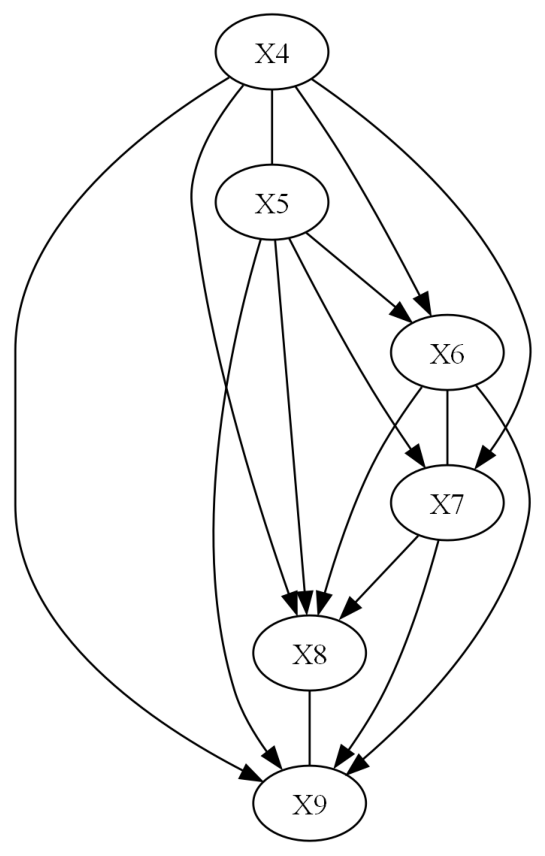

In [88]:
local_graph = cdag.get_local_graph(cluster_of_interest)
local_graph.draw_pydot_graph()

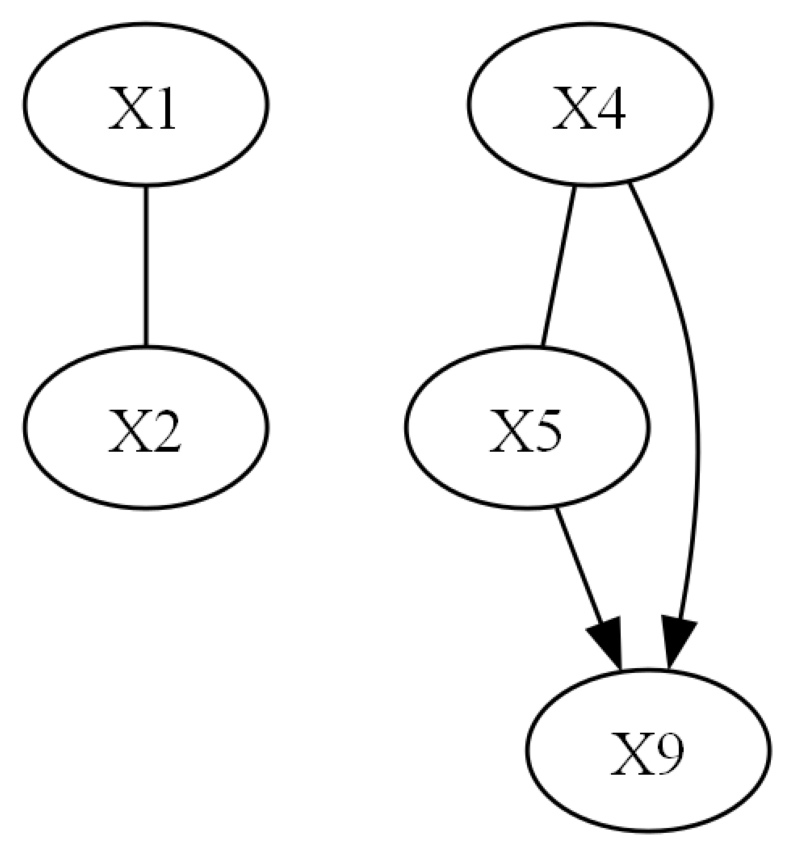

In [74]:
from causallearn.graph.GraphClass import CausalGraph
# It is also possible to get an arbitrary subgraph:
# list_of_node_names = ['X2', 'X4' , 'X5', 'X8', 'X7', 'X1']
list_of_node_names = ['X9', 'X5', 'X1', 'X4', 'X2']
list_of_nodes = CDAG.get_list_of_nodes_by_name(list_of_node_names = list_of_node_names, cg = cdag.cg)
subgraph = cdag.subgraph(list_of_nodes)
restricted_causal_graph = CausalGraph(len(list_of_node_names), node_names = list_of_node_names)
restricted_causal_graph.G = subgraph
restricted_causal_graph.draw_pydot_graph()